In [3]:
import os
import csv
import h5py
from glob import glob
from tqdm import tqdm
import numpy as np
from PIL import Image, ImageOps
import io
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib ipympl

In [32]:
DATA_PATH = '/home/kalyanav/MS_thesis/Physion_dataset/Collide_dynamics_training_HDF5s/Collide'
FILE_PATH = 'pilot_it2_collision_assorted_targets_box_2_dis_2_occ_0067.hdf5'

In [33]:
# Reading the h5 files
hf = h5py.File(os.path.join(DATA_PATH, FILE_PATH), 'r')

In [34]:
hf.keys()

<KeysViewHDF5 ['frames', 'static']>

In [35]:
frames = hf.get('frames')

In [36]:
frames.keys()

<KeysViewHDF5 ['0000', '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059', '0060', '0061', '0062', '0063', '0064', '0065', '0066', '0067', '0068', '0069', '0070', '0071', '0072', '0073', '0074', '0075', '0076', '0077', '0078', '0079', '0080', '0081', '0082', '0083', '0084', '0085', '0086', '0087', '0088', '0089', '0090', '0091', '0092', '0093', '0094', '0095', '0096', '0097', '0098', '0099', '0100', '0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0110', '0111', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121', '0122', '

In [41]:
#getting all the frame id and track id and the x y z locations
all_data = []
for f in frames:

    frame_id = f
    position = np.array(hf['frames'][f]['objects']['center'])
    objects = [i for i in range(len(position))]
    
    data = []
    for object_id, pos in zip(objects, position):
        data.append({
            'frame_no': frame_id,
            'object_id': object_id,
            'x': pos[0],
            'y': pos[1],
            'z': pos[2]
        })

    all_data.extend(data)
    

df = pd.DataFrame(all_data)
print(df)

     frame_no  object_id         x         y             z
0        0000          0  2.000000  0.005000 -1.553819e-01
1        0000          1  1.000000  0.188433 -7.244066e-07
2        0000          2 -0.902499  0.175000 -1.723090e-03
3        0000          3 -1.936754  0.250000  1.000000e+00
4        0000          4 -1.579565  0.250000 -9.993984e-01
...       ...        ...       ...       ...           ...
1059     0151          2  2.111398  0.172754  7.977945e-01
1060     0151          3 -1.936754  0.250000  1.000000e+00
1061     0151          4 -1.579565  0.250000 -9.993984e-01
1062     0151          5  2.313426  0.242256 -6.882089e-01
1063     0151          6 -0.043341  0.171126  7.500000e-01

[1064 rows x 5 columns]


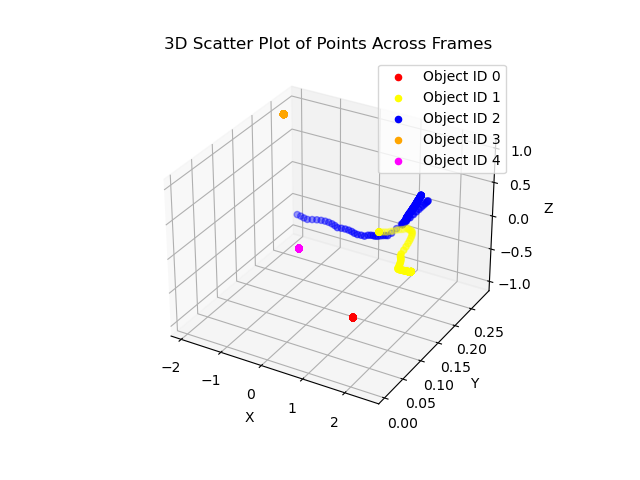

In [43]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Sample data (replace this with your data loading code)
# data = {
#     'frame_no': ['0000', '0000', '0000', '0001', '0001', '0001', '0002', '0002', '0002'],
#     'object_id': [0, 1, 2, 0, 1, 2, 0, 1, 2],
#     'x': [2.0000000e+00, 1.0000051e+00, -8.9473426e-01, 2.1000000e+00, 1.1000051e+00, -8.9473426e-01, 2.2000000e+00, 1.2000051e+00, -8.9473426e-01],
#     'y': [0.0000000e+00, 5.2146614e-04, 1.9228458e-04, 0.0000000e+00, 5.2146614e-04, 1.9228458e-04, 0.0000000e+00, 5.2146614e-04, 1.9228458e-04],
#     'z': [-1.3768110e-01, 5.8408832e-06, -7.3297657e-03, -1.3768110e-01, 5.8408832e-06, -7.3297657e-03, -1.3768110e-01, 5.8408832e-06, -7.3297657e-03]
# }

# df = pd.DataFrame(data)
desired_object_id = [0,1,2,3,4]
color_map = ['red', 'yellow', 'blue', 'orange', 'magenta']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for desired_obj, color in zip(desired_object_id, color_map):
    # Filter the DataFrame for the desired object ID
    filtered_df = df[df['object_id'] == desired_obj]
    
    # Scatter plot points, highlighting the first point in a different color
    ax.scatter(
        filtered_df['x'], 
        filtered_df['y'], 
        filtered_df['z'], 
        c=color,  # Use the index for coloring
        s=20,
        label=f'Object ID {desired_obj}'  # Add a label for the legend
    )

# Customize the plot
ax.set_title('3D Scatter Plot of Points Across Frames')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.show()







In [39]:
first_frame = frames.get('0000')

In [13]:
first_frame['objects'].keys()

<KeysViewHDF5 ['angular_velocities', 'back', 'bottom', 'center', 'forwards', 'front', 'left', 'positions', 'right', 'rotations', 'top', 'velocities']>

In [8]:
first_frame.keys()

<KeysViewHDF5 ['camera_matrices', 'collisions', 'env_collisions', 'images', 'labels', 'objects']>

In [9]:
static = hf.get('static')

In [10]:
static.keys()

<KeysViewHDF5 ['bounciness', 'color', 'distractors', 'dynamic_friction', 'git_commit', 'initial_position', 'initial_rotation', 'mass', 'mesh', 'model_names', 'object_ids', 'object_segmentation_colors', 'occluders', 'probe_id', 'probe_mass', 'probe_type', 'push_force', 'push_position', 'push_time', 'randomize', 'room', 'scale', 'scale_x', 'scale_y', 'scale_z', 'seed', 'static_friction', 'stimulus_name', 'target_id', 'target_rotation', 'target_type', 'trial_num', 'trial_seed', 'zone_id']>

In [11]:
color = static.get('color')

In [12]:
np.array(color)

array([[0.51127472, 0.40493414, 0.78379859],
       [0.13927371, 0.13974578, 0.09483076],
       [0.43417184, 0.61088697, 0.91301105]])

In [13]:
object_ids = static.get('object_ids')

In [14]:
np.array(object_ids)

array([1, 2, 3], dtype=int32)

In [15]:
objects_first_frame = first_frame.get('objects')

In [16]:
objects_first_frame.keys()

<KeysViewHDF5 ['angular_velocities', 'back', 'bottom', 'center', 'forwards', 'front', 'left', 'positions', 'right', 'rotations', 'top', 'velocities']>

In [17]:
images_first_frame = first_frame.get('images')

In [18]:
images_first_frame.keys()

<KeysViewHDF5 ['_id', '_img']>

In [19]:
img_first_frame_id = images_first_frame.get('_id')

In [20]:
img_first_frame_img = images_first_frame.get('_img')

In [21]:
img_first_frame_img

<HDF5 dataset "_img": shape (87072,), type "|u1">

In [22]:
second_frame = frames.get('0001')

In [23]:
second_frame.keys()

<KeysViewHDF5 ['camera_matrices', 'collisions', 'env_collisions', 'images', 'labels', 'objects']>

In [24]:
second_frame.get('camera_matrices').keys()

<KeysViewHDF5 ['camera_matrix', 'projection_matrix']>

In [25]:
np.array(second_frame['camera_matrices']['camera_matrix'])

array([ 9.6346629e-01,  0.0000000e+00,  2.6782954e-01,  5.9604645e-08,
       -2.0641277e-02,  9.9702579e-01,  7.4253112e-02, -4.9851286e-01,
        2.6703298e-01,  7.7068716e-02, -9.6060073e-01, -3.3009286e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00],
      dtype=float32)

In [26]:
np.array(second_frame['camera_matrices']['projection_matrix'])

array([ 1.9209821e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  1.9209821e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  1.0010004e-03,  1.0010010e-01,
        0.0000000e+00,  0.0000000e+00, -1.0000000e+00,  0.0000000e+00],
      dtype=float32)

In [27]:
second_frame.get('collisions').keys()

<KeysViewHDF5 ['contacts', 'object_ids', 'relative_velocities', 'states']>

In [28]:
second_frame.get('env_collisions').keys()

<KeysViewHDF5 ['contacts', 'object_ids']>

In [29]:
second_frame_objs = second_frame.get('objects')

In [30]:
second_frame_objs.keys()

<KeysViewHDF5 ['angular_velocities', 'back', 'bottom', 'center', 'forwards', 'front', 'left', 'positions', 'right', 'rotations', 'top', 'velocities']>

In [31]:
np.array(second_frame_objs.get('positions'))

array([[ 2.0000000e+00,  0.0000000e+00, -1.3768110e-01],
       [ 1.0000045e+00,  6.2528998e-04,  5.8500891e-06],
       [-7.9116356e-01,  1.7854571e-04, -1.4633121e-02]], dtype=float32)

In [32]:
np.array(second_frame_objs.get('center'))

array([[ 2.0000000e+00,  4.9999999e-03, -1.3768110e-01],
       [ 1.0000045e+00,  6.3125290e-02,  5.9004260e-06],
       [-8.0628878e-01,  1.7451674e-01, -1.3077183e-02]], dtype=float32)

In [33]:
np.array(second_frame_objs.get('velocities'))

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.6860940e-06, -6.5565109e-07, -2.3858411e-06],
       [ 9.6607418e+00, -4.8623703e-02, -6.5012187e-01]], dtype=float32)

In [34]:
second_frame_images = second_frame.get('images')

In [35]:
second_frame_images.keys()

<KeysViewHDF5 ['_id', '_img']>

In [36]:
img_second_frame_img = second_frame_images.get('_img')

In [37]:
img_second_frame_id = second_frame_images.get('_id')

In [38]:
np.array(img_second_frame_id).shape

(1359,)

In [39]:
np.array(img_second_frame_img).shape

(87767,)

In [40]:
second_frame_labels = second_frame.get('labels')

In [41]:
second_frame_labels.keys()

<KeysViewHDF5 ['has_target', 'has_zone', 'target_contacting_zone', 'target_delta_position', 'target_has_moved', 'target_on_ground', 'trial_complete', 'trial_end', 'trial_timeout']>

In [42]:
np.array(img_second_frame_id)

array([137,  80,  78, ...,  66,  96, 130], dtype=uint8)

In [43]:
img_second_frame_img[:]


array([137,  80,  78, ...,  66,  96, 130], dtype=uint8)

In [44]:
img_second_frame_img = img_second_frame_img[:]

In [45]:
image = Image.open(io.BytesIO(img_second_frame_img))

In [46]:
image = ImageOps.mirror(image)

In [47]:
np.array(image).shape

(256, 256, 3)

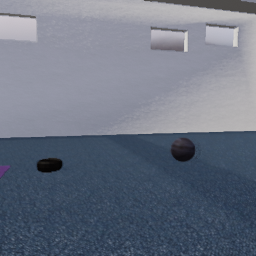

In [48]:
image

In [49]:
positions = np.array(second_frame_objs.get('positions'))

In [50]:
positions

array([[ 2.0000000e+00,  0.0000000e+00, -1.3768110e-01],
       [ 1.0000045e+00,  6.2528998e-04,  5.8500891e-06],
       [-7.9116356e-01,  1.7854571e-04, -1.4633121e-02]], dtype=float32)

In [51]:
import matplotlib.pyplot as plt

In [52]:
image_np = np.array(image)

In [53]:
# import numpy as np

# # Given camera matrix and 3D positions
# camera_matrix = np.array([9.6346629e-01, 0.0000000e+00, 2.6782954e-01, 5.9604645e-08,
#                           -2.0641277e-02, 9.9702579e-01, 7.4253112e-02, -4.9851286e-01,
#                            2.6703298e-01, 7.7068716e-02, -9.6060073e-01, -3.3009286e+00,
#                            0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
#                          dtype=np.float32)

# positions_3d = np.array([[2.0000000e+00, 0.0000000e+00, -1.3768110e-01],
#                         [1.0000045e+00, 6.2528998e-04, 5.8500891e-06],
#                         [-7.9116356e-01, 1.7854571e-04, -1.4633121e-02]],
#                         dtype=np.float32)

# # Reshape camera matrix to (4, 4)
# camera_matrix = camera_matrix.reshape(4, 4)

# # Multiply 3D positions by the camera matrix
# positions_camera_space = np.dot(np.concatenate((positions_3d, np.ones((3, 1))), axis=1), camera_matrix.T)

# # Given projection matrix
# projection_matrix = np.array([1.9209821e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
#                               0.0000000e+00, 1.9209821e+00, 0.0000000e+00, 0.0000000e+00,
#                               0.0000000e+00, 0.0000000e+00, 1.0010004e-03, 1.0010010e-01,
#                               0.0000000e+00, 0.0000000e+00, -1.0000000e+00, 0.0000000e+00],
#                              dtype=np.float32)

# # Reshape projection matrix to (4, 4)
# projection_matrix = projection_matrix.reshape(4, 4)

# # Project 3D positions into 2D image coordinates
# positions_2d = np.dot(positions_camera_space, projection_matrix.T)

# # Normalize the coordinates to [0, 1] range
# positions_2d_normalized = positions_2d[:, :2] / positions_2d[:, 3].reshape(-1, 1)

# # Scale and translate to fit within a 256x256 image
# image_size = 256
# positions_2d_image = (positions_2d_normalized + 1) * (image_size / 2)

# # Ensure the coordinates stay within the 256x256 range
# positions_2d_image = np.clip(positions_2d_image, 0, image_size - 1)

# # Now, positions_2d_image contains the 2D coordinates suitable for plotting in a 256x256 image



In [54]:
camera_matrix = np.array([9.6346629e-01, 0.0000000e+00, 2.6782954e-01, 5.9604645e-08,
                          -2.0641277e-02, 9.9702579e-01, 7.4253112e-02, -4.9851286e-01,
                           2.6703298e-01, 7.7068716e-02, -9.6060073e-01, -3.3009286e+00,
                           0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
                         dtype=np.float32)

positions_3d = np.array([[2.0000000e+00, 0.0000000e+00, -1.3768110e-01,1.000],
                        [1.0000045e+00, 6.2528998e-04, 5.8500891e-06, 1.000],
                        [-7.9116356e-01, 1.7854571e-04, -1.4633121e-02, 1.000]],
                        dtype=np.float32)

# Reshape camera matrix to (4, 4)
camera_matrix = camera_matrix.reshape(4, 4)


# Given projection matrix
projection_matrix = np.array([1.9209821e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
                              0.0000000e+00, 1.9209821e+00, 0.0000000e+00, 0.0000000e+00,
                              0.0000000e+00, 0.0000000e+00, 1.0010004e-03, 1.0010010e-01,
                              0.0000000e+00, 0.0000000e+00, -1.0000000e+00, 0.0000000e+00],
                             dtype=np.float32)

projection_matrix = projection_matrix.reshape(4,4)

camera_points = np.dot(projection_matrix, np.dot(camera_matrix, positions_3d.T)).T


In [55]:
camera_points

array([[ 3.6307669 , -1.056576  ,  0.09746286,  2.6346061 ],
       [ 1.8508129 , -0.99608755,  0.09706321,  3.0338519 ],
       [-1.4718153 , -0.9280088 ,  0.09659848,  3.498125  ]],
      dtype=float32)

In [15]:
positions_3d = np.array([[2.0000000e+00, 0.0000000e+00, -1.3768110e-01],
                        [1.0000045e+00, 6.2528998e-04, 5.8500891e-06],
                        [-7.9116356e-01, 1.7854571e-04, -1.4633121e-02]],
                        dtype=np.float32)

In [16]:
camera_matrix =  np.array(hf['frames']['0000']['camera_matrices']['camera_matrix']).reshape(4,4)

In [17]:
# from https://github.com/neuroailab/physics-models/blob/master/physion/objective/RPIN.py repo

def get_camera_matrix(f):
    projection_matrix =  np.array(f['frames']['0000']['camera_matrices']['projection_matrix']).reshape(4,4)
    camera_matrix =  np.array(f['frames']['0000']['camera_matrices']['camera_matrix']).reshape(4,4)
    return np.matmul(projection_matrix, camera_matrix)

def project_points(points, camera_matrix):
    assert points.ndim == 2
    assert points.shape[1] == 3
    
    points = np.pad(points, [(0,0), (0,1)], constant_values=1).T
    projected_points = np.matmul(camera_matrix, points).T
    projected_points = projected_points / projected_points[:,-1:]
    return projected_points

points = get_camera_matrix(hf)


In [18]:
projected_points = project_points(positions_3d, camera_matrix)

In [20]:
projected_points

array([[ 1.8900576 , -0.55001867, -2.6346061 ,  1.        ],
       [ 0.96347225, -0.51853037, -3.0338519 ,  1.        ],
       [-0.76617855, -0.4830908 , -3.498125  ,  1.        ]],
      dtype=float32)

In [14]:
import numpy as np

# Given projection matrix
projection_matrix = np.array([1.9209821e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
                              0.0000000e+00, 1.9209821e+00, 0.0000000e+00, 0.0000000e+00,
                              0.0000000e+00, 0.0000000e+00, 1.0010004e-03, 1.0010010e-01,
                              0.0000000e+00, 0.0000000e+00, -1.0000000e+00, 0.0000000e+00],
                             dtype=np.float32)

projection_matrix = projection_matrix.reshape(4, 4)

# Given camera matrix
camera_matrix = np.array([9.6346629e-01, 0.0000000e+00, 2.6782954e-01, 5.9604645e-08,
                          -2.0641277e-02, 9.9702579e-01, 7.4253112e-02, -4.9851286e-01,
                           2.6703298e-01, 7.7068716e-02, -9.6060073e-01, -3.3009286e+00,
                           0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
                         dtype=np.float32)

# Calculate the extrinsic matrix by taking the inverse of the camera matrix
extrinsic_matrix = np.linalg.inv(camera_matrix.reshape(4,4))

# Calculate the intrinsic matrix by multiplying the projection matrix with the extrinsic matrix
intrinsic_matrix = np.matmul(projection_matrix, np.linalg.inv(extrinsic_matrix))

# Print the intrinsic and extrinsic matrices
print("Intrinsic Matrix:")
print(intrinsic_matrix)
print("\nExtrinsic Matrix:")
print(extrinsic_matrix)

Intrinsic Matrix:
[[ 1.8508015e+00  1.5980378e-09  5.1449567e-01 -3.5559463e-08]
 [-3.9651521e-02  1.9152687e+00  1.4263891e-01 -9.5763427e-01]
 [ 2.6730009e-04  7.7145814e-05 -9.6156175e-04  9.6795872e-02]
 [-2.6703295e-01 -7.7068716e-02  9.6060073e-01  3.3009286e+00]]

Extrinsic Matrix:
[[ 9.6346635e-01 -2.0641278e-02  2.6703295e-01  8.7116677e-01]
 [-4.4006039e-09  9.9702579e-01  7.7068716e-02  7.5142848e-01]
 [ 2.6782957e-01  7.4253112e-02 -9.6060079e-01 -3.1338584e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [17]:
points_2d_homogeneous = np.matmul(intrinsic_matrix, np.matmul(extrinsic_matrix, positions_3d.T))

# Perform perspective division to convert homogeneous coordinates to 2D coordinates
points_2d = points_2d_homogeneous[:2] / points_2d_homogeneous[3]

# Print the 2D points
print("2D Points:")
print(points_2d)

2D Points:
[[ 2.7904827e+01 -3.3571747e+05 -1.0386061e+02]
 [-1.2987553e-06 -2.0990625e+02  2.3429353e-02]]


In [7]:
camera_points

array([[ 3.6307669 , -1.056576  ,  0.09746286,  2.6346061 ],
       [ 1.8508129 , -0.99608755,  0.09706321,  3.0338519 ],
       [-1.4718153 , -0.9280088 ,  0.09659848,  3.498125  ]],
      dtype=float32)

In [56]:
camera_points[:, :2] 

array([[ 3.6307669 , -1.056576  ],
       [ 1.8508129 , -0.99608755],
       [-1.4718153 , -0.9280088 ]], dtype=float32)

In [9]:
object_locations = camera_points

In [10]:
scaled_locations = ((object_locations - object_locations.min(0)) / (object_locations.max(0) - object_locations.min(0)) * 255).astype('int')

In [11]:
scaled_locations

array([[255,   0, 255,   0],
       [166, 119, 137, 117],
       [  0, 255,   0, 255]])

In [63]:
positions_3d = np.array([[2.0000000e+00, 0.0000000e+00, -1.3768110e-01,1.000],
                        [1.0000045e+00, 6.2528998e-04, 5.8500891e-06, 1.000],
                        [-7.9116356e-01, 1.7854571e-04, -1.4633121e-02, 1.000]],
                        dtype=np.float32)

projection_matrix = np.array([1.9209821e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
                              0.0000000e+00, 1.9209821e+00, 0.0000000e+00, 0.0000000e+00,
                              0.0000000e+00, 0.0000000e+00, 1.0010004e-03, 1.0010010e-01,
                              0.0000000e+00, 0.0000000e+00, -1.0000000e+00, 0.0000000e+00],
                             dtype=np.float32)
point_2d_homogeneous = np.dot(projection_matrix.reshape(4,4), positions_3d.T)

x_2d = point_2d_homogeneous[0] / point_2d_homogeneous[2]
y_2d = point_2d_homogeneous[1] / point_2d_homogeneous[2]

# Print the resulting 2D coordinates
print("2D Coordinates (x, y):", x_2d, y_2d)

2D Coordinates (x, y): [ 38.43414   19.190697 -15.185134] [0.        0.0119997 0.0034269]


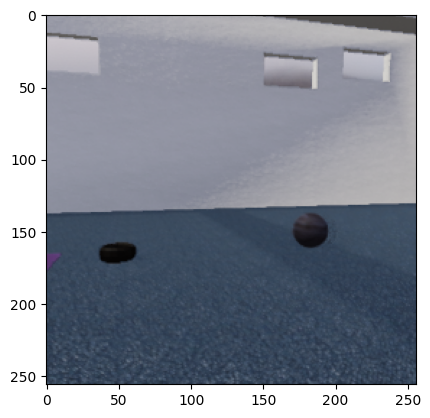

In [90]:
plt.imshow(image_np)
plt.show()